In [1]:
from pyrecodes import main
system = main.run('./Example 4/NorthEast_SF_Housing_Interface_Infrastructure_Main.json')

/Users/nikola/pyrecodes/pyrecodes/Component.py:477: RuntimeWarning: invalid value encountered in divide
  step_limits = list(np.divide(restoration_times, restoration_times[-1])) + [1.0]


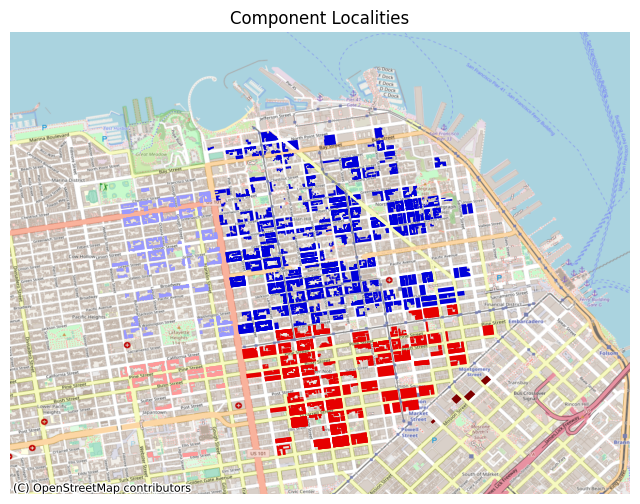

In [3]:
from pyrecodes import GeoVisualisator as gvis
from importlib import reload
reload(gvis)
geo_visualisator = gvis.R2D_GeoVisualisator(system.components)
geo_visualisator.plot_component_localities()

/Users/nikola/pyrecodes/Plotter.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


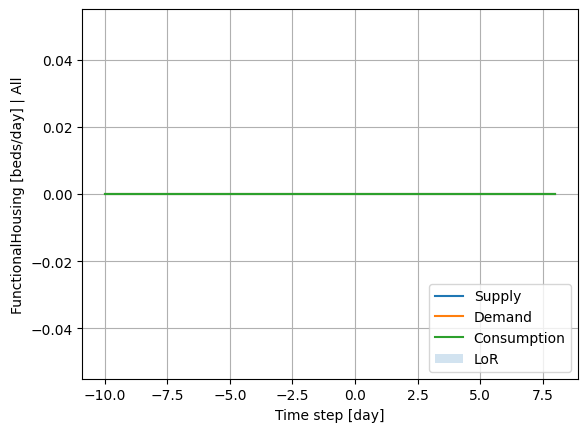

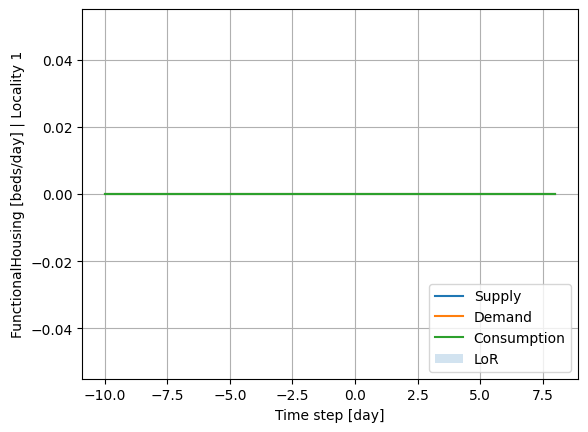

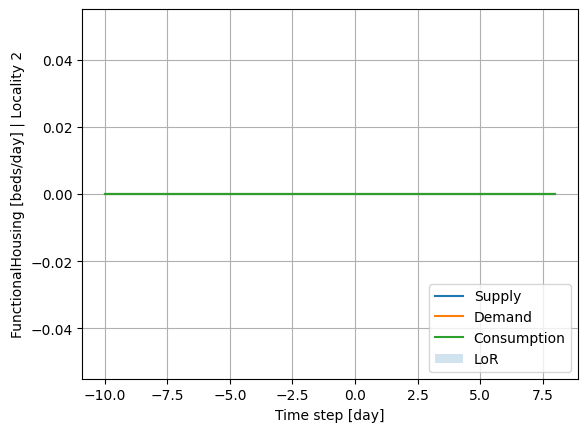

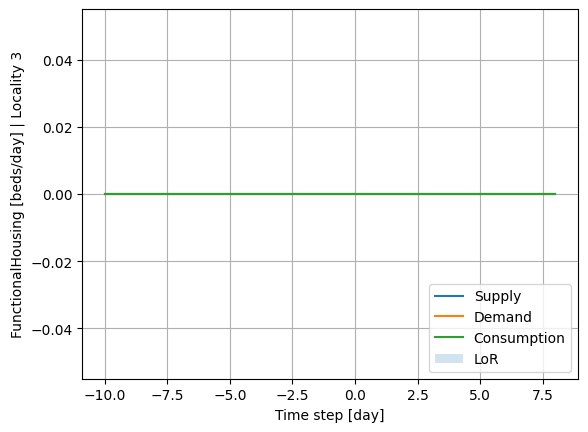

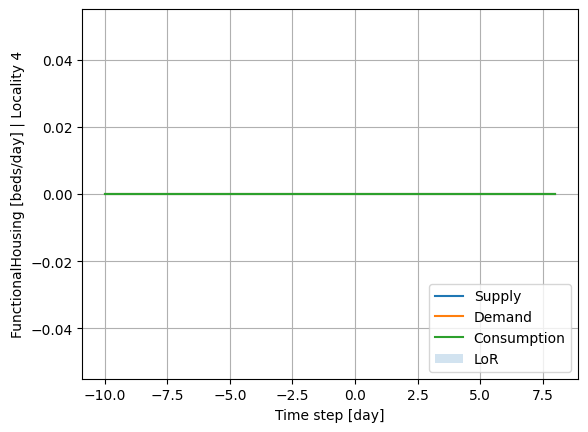

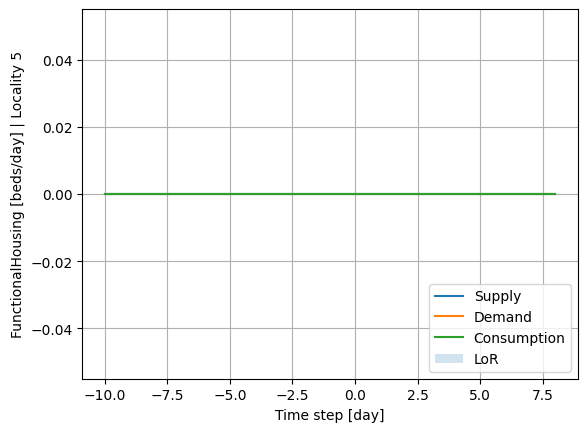

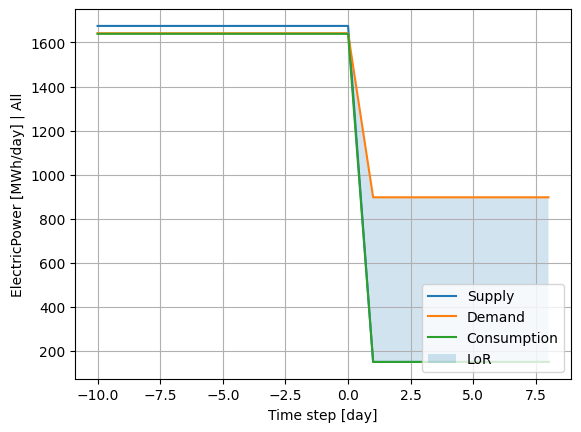

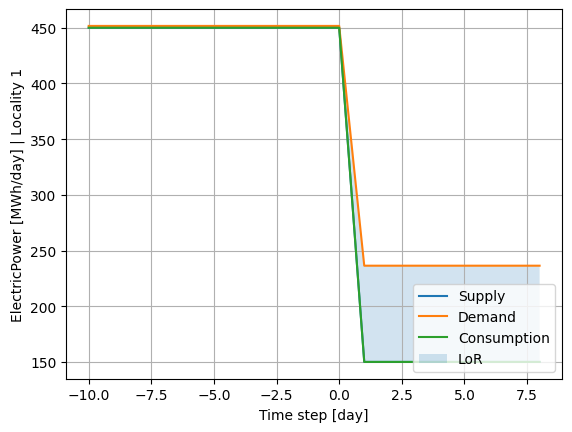

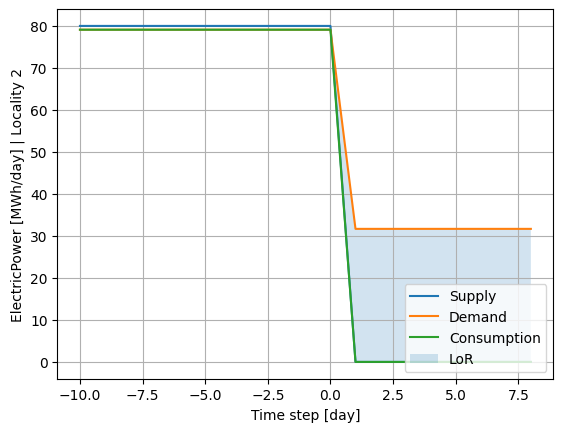

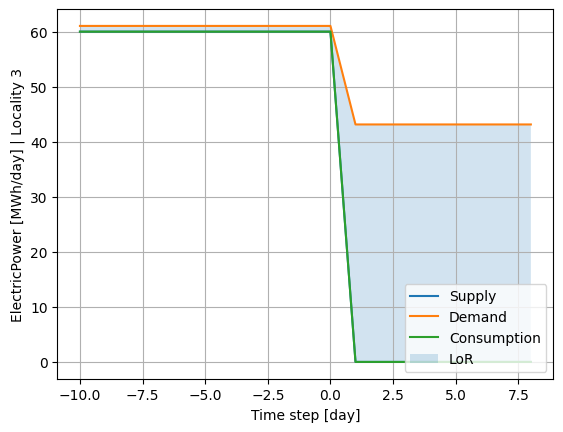

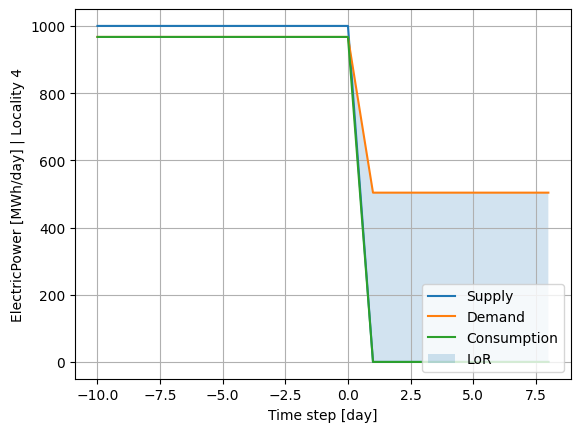

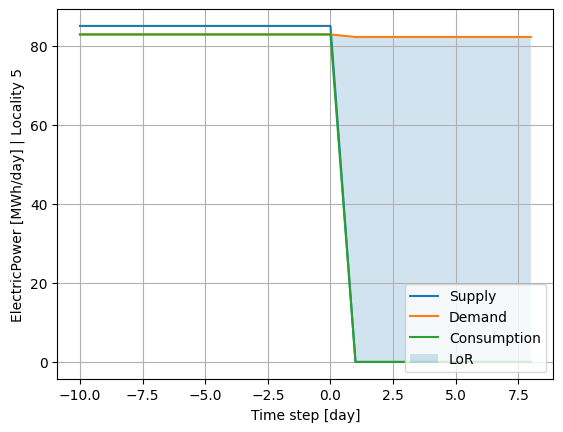

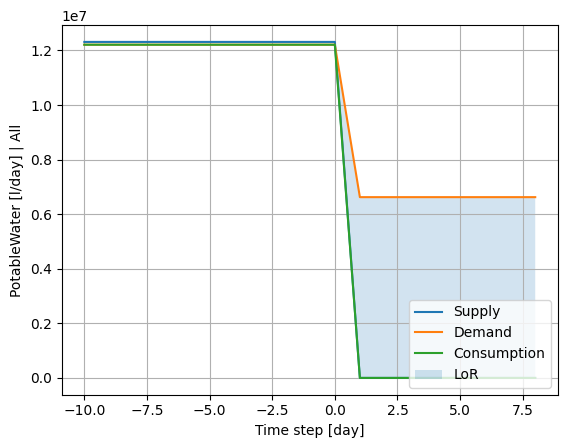

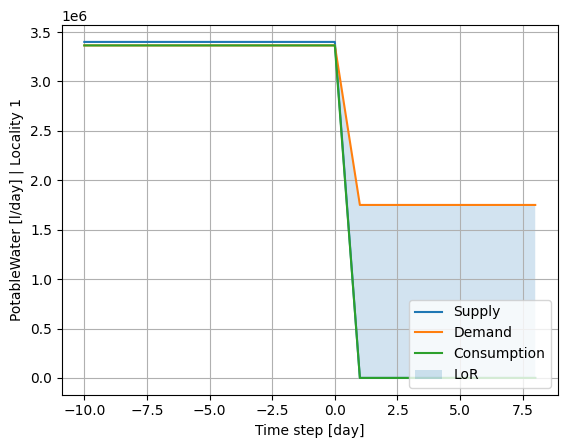

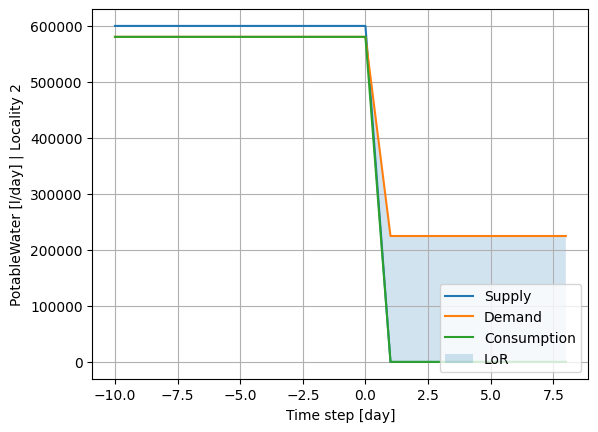

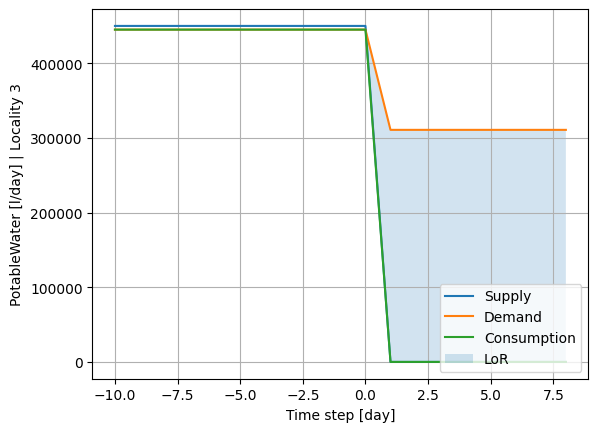

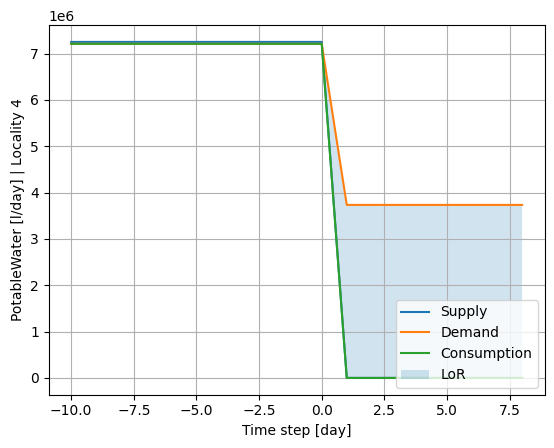

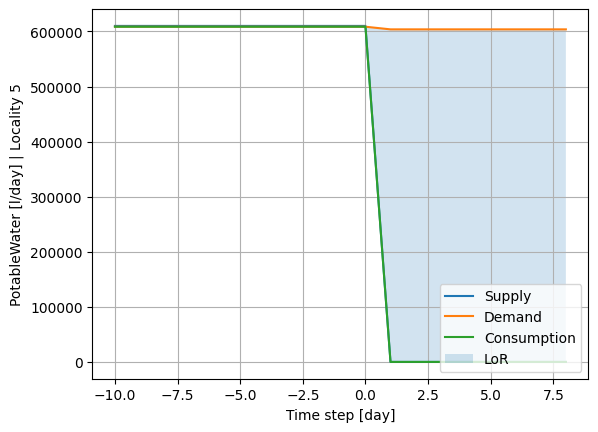

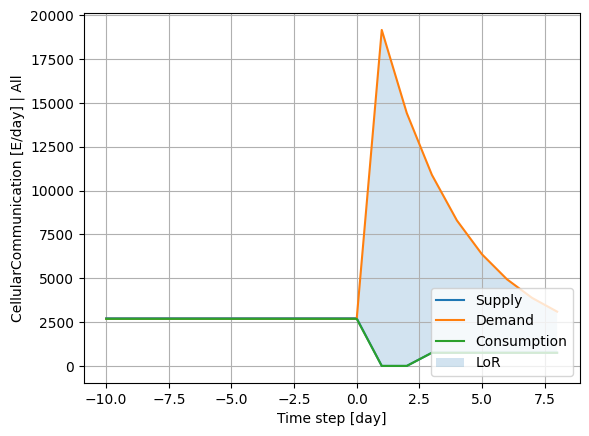

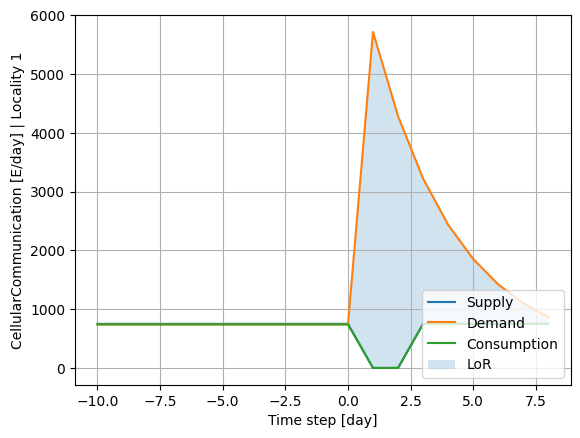

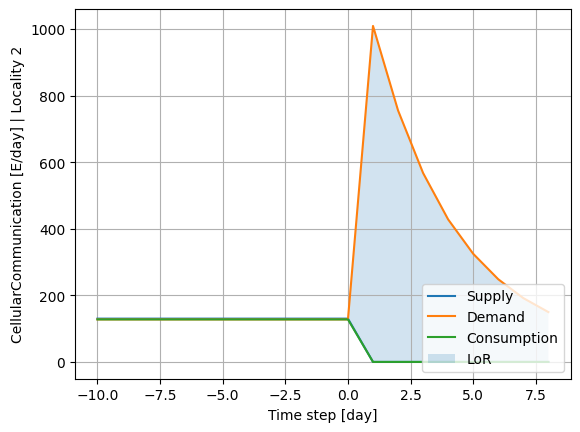

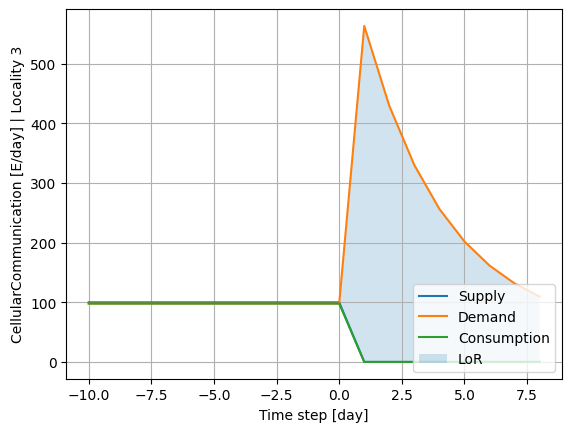

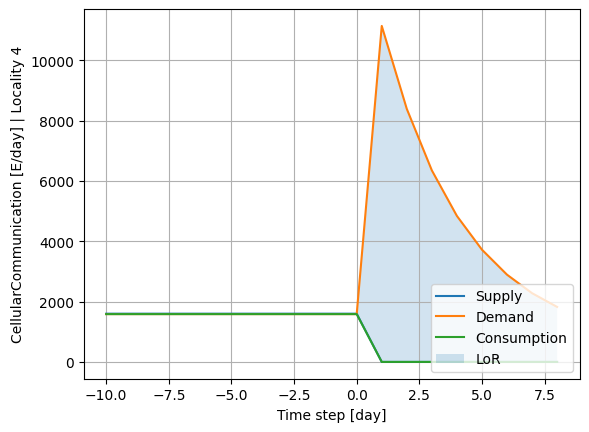

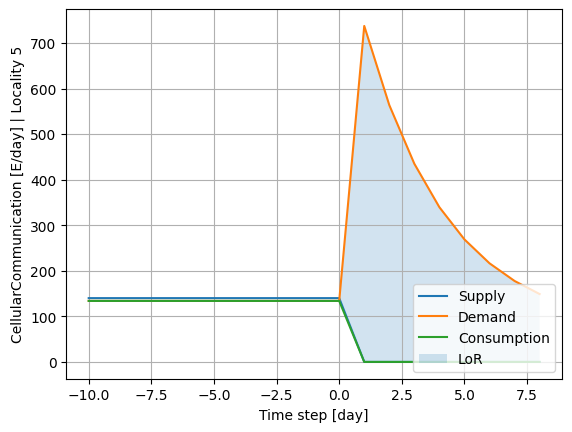

In [2]:
from pyrecodes import Plotter

plotter_object = Plotter.Plotter()
x_axis_label = 'Time step [day]'
resource_names = ['FunctionalHousing', 'ElectricPower', 'PotableWater', 'CellularCommunication']
resource_units = ['[beds/day]', '[MWh/day]', '[l/day]', '[E/day]']
for i, resource_name in enumerate(resource_names):
    for resilience_calculator_id in range(0, 6):
        y_axis_label = f'{resource_name} {resource_units[i]} | {system.resilience_calculators[resilience_calculator_id].scope}'
        axis_object = plotter_object.setup_lor_plot_fig(x_axis_label, y_axis_label)    
        time_range = system.time_step
        time_steps_before_event = 10 # 
        plotter_object.plot_single_resource(list(range(-time_steps_before_event, system.time_step)), system.resilience_calculators[resilience_calculator_id].system_supply[resource_name][:time_range], 
                                            system.resilience_calculators[resilience_calculator_id].system_demand[resource_name][:time_range], 
                                            system.resilience_calculators[resilience_calculator_id].system_consumption[resource_name][:time_range], axis_object, warmup=time_steps_before_event)
        # plotter_object.save_current_figure(f'{resource_name} {system.resilience_calculators[resilience_calculator_id].scope}')
    